In [1]:
import requests
import json

In [23]:
def get_publications(base_url, params):
    """
    Fetches publications from the OpenAIRE API based on provided parameters.
    
    Args:
        base_url (str): The API endpoint URL.
        params (dict): Query parameters for filtering publications.
        
    Returns:
        list: A list of publications (JSON format).
    """
    try:
        response = requests.get(base_url, params=params)
        print(response)
        response.raise_for_status()  # Raise an error for bad HTTP response codes
        
        data = response.json()
        return data
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return []

if __name__ == "__main__":
    # Base API endpoint
    BASE_URL = "https://api.openaire.eu/search/publications"
    
    # Define query parameters
    params = {

        "page": 1, # Page number of results
        "size": 100,  # Number of results per page
        "format": "json",  # Response format
        # "sortBy": "resultdateofacceptance,descending", # Sort by citation count in descending order
        # "keywords": "machine learning artificial intelligence",  # Search by keywords
        # "instancetype": "article,book",  # Example: fetch articles and books
        # "sdg": "3,4",  # Example: Sustainable Development Goals 3 and 4
        "fos": "environmental biotechnology" # Example: Field of Science classifications
        # "peerReviewed": "true",
        # "diamondJournal": "false",
        # "publiclyFunded": "true",
        # "green": "true",
        # "openAccessColor": "gold,hybrid",
    }
    
    # Fetch publications
    publications = get_publications(BASE_URL, params)
    # print(publications)


# for item in range(0, 10):
#     print(publications['response']['results']['result'][item]['metadata']['oaf:entity']['oaf:result']['title'])
#     print()
#     print(publications['response']['results']['result'][item]['metadata']['oaf:entity']['oaf:result']['dateofacceptance'])
#     print()
    # print(publications['response']['results']['result'][item]['metadata']['oaf:entity']['oaf:result']['metrics'])
#     # print()

print(publications['response']['results']['result'][0]['metadata']['oaf:entity']['oaf:result']['measure'])
# # print()
# print(publications['response']['results'])


<Response [200]>
[{'@id': 'influence', '@score': '2.9671152E-9', '@class': 'C5'}, {'@id': 'popularity', '@score': '6.4368786E-9', '@class': 'C4'}, {'@id': 'influence_alt', '@score': '5', '@class': 'C5'}, {'@id': 'popularity_alt', '@score': '3.176', '@class': 'C4'}, {'@id': 'impulse', '@score': '2', '@class': 'C5'}]


In [24]:
# Data extraction for 
env_bio_data = []

# Influence
# Popularity
# Impulse
# Citations --> same with Influence

for item in range(0, 100):

    buffer_dic = {}
    
    try:
        abstract = publications['response']['results']['result'][item]['metadata']['oaf:entity']['oaf:result']['description']
    except KeyError as e:
        continue

    buffer_dic["title"] = publications['response']['results']['result'][item]['metadata']['oaf:entity']['oaf:result']['title']
    buffer_dic["abstract"] = abstract
    buffer_dic["dateofAcceptance"] = publications['response']['results']['result'][item]['metadata']['oaf:entity']['oaf:result']['dateofacceptance']
    buffer_dic["metrics"] =publications['response']['results']['result'][item]['metadata']['oaf:entity']['oaf:result']['measure']

    env_bio_data.append(buffer_dic)

print(len(env_bio_data))

81


In [ ]:
print(len(env_bio_data))

In [26]:
for item in env_bio_data:
    print(item)
    print()

{'title': [{'@classid': 'main title', '@classname': 'main title', '@schemeid': 'dnet:dataCite_title', '@schemename': 'dnet:dataCite_title', '$': 'Modeling hydro-biogeochemical transformation of chromium in hyporheic zone: Effects of spatial and temporal resolutions'}, {'@classid': 'main title', '@classname': 'main title', '@schemeid': 'dnet:dataCite_title', '@schemename': 'dnet:dataCite_title', '$': 'modeling hydro biogeochemical transformation of chromium in hyporheic zone effects of spatial and temporal resolutions'}], 'abstract': {'$': 'Abstract   Effects of spatial and temporal resolutions (SR and TR) on modeling hydro-biogeochemical transformation of chromium (Cr) are important in simulating reactive transport processes. The current study was conducted in the hyporheic zone (HZ) at the Hanford Site of the U.S. Department of Energy, which has been known for its highly heterogeneous sediments and transient hydrodynamics. Distributions of hydraulic conductivity and sediment-associate

In [ ]:
# Dump data to json file


In [6]:
# Date Extractor from pubs
dates_list = []

for item in range(0, 100):
    dates_list.append(publications['response']['results']['result'][item]['metadata']['oaf:entity']['oaf:result']['dateofacceptance']["$"])

print(dates_list)
print("---------")

['2017-08-24', '2014-03-30', '2019-12-05', '2020-05-06', '1996-03-01', '2014-05-01', '2007-01-01', '2014-02-24', '2013-01-01', '2000-04-01', '2023-02-02', '2012-02-01', '2015-12-14', '2019-09-15', '2009-08-01', '2008-07-01', '2016-12-01', '2001-01-01', '2011-08-01', '2016-12-01', '2021-12-14', '2022-12-13', '2006-03-01', '2017-01-10', '1992-10-01', '2022-05-01', '2012-07-01', '2007-07-25', '2008-05-16', '2022-09-13', '2017-07-22', '2008-10-10', '2001-11-01', '2019-01-01', '2016-07-01', '2001-12-01', '2020-01-06', '2021-09-18', '2011-07-19', '1983-01-01', '1997-02-01', '2020-06-01', '1993-06-01', '2022-09-16', '2014-04-01', '2021-07-17', '2019-02-01', '2019-09-26', '2015-05-01', '2015-05-29', '2014-01-20', '2022-01-01', '2022-10-03', '2023-01-01', '2006-08-01', '1989-02-01', '2015-10-01', '1992-07-01', '2021-02-02', '2021-04-29', '1995-06-01', '2001-01-01', '1993-02-01', '2018-12-12', '2013-12-06', '2019-07-03', '2022-07-13', '2017-08-31', '2003-11-18', '2007-06-01', '1997-07-01', '2004

In [7]:
# Date Extractor from pubs
import re

new_list = []

for item in dates_list:
    match = re.search(r'\b\d{4}\b', item)
    new_list.append(int(match.group()))

print(new_list)

[2017, 2014, 2019, 2020, 1996, 2014, 2007, 2014, 2013, 2000, 2023, 2012, 2015, 2019, 2009, 2008, 2016, 2001, 2011, 2016, 2021, 2022, 2006, 2017, 1992, 2022, 2012, 2007, 2008, 2022, 2017, 2008, 2001, 2019, 2016, 2001, 2020, 2021, 2011, 1983, 1997, 2020, 1993, 2022, 2014, 2021, 2019, 2019, 2015, 2015, 2014, 2022, 2022, 2023, 2006, 1989, 2015, 1992, 2021, 2021, 1995, 2001, 1993, 2018, 2013, 2019, 2022, 2017, 2003, 2007, 1997, 2004, 2020, 2019, 2008, 2009, 2018, 2017, 2020, 2014, 2014, 2018, 2019, 2022, 1998, 2018, 2017, 2010, 2010, 2020, 2007, 2014, 2014, 2016, 2004, 2020, 2020, 2022, 2022, 2022]


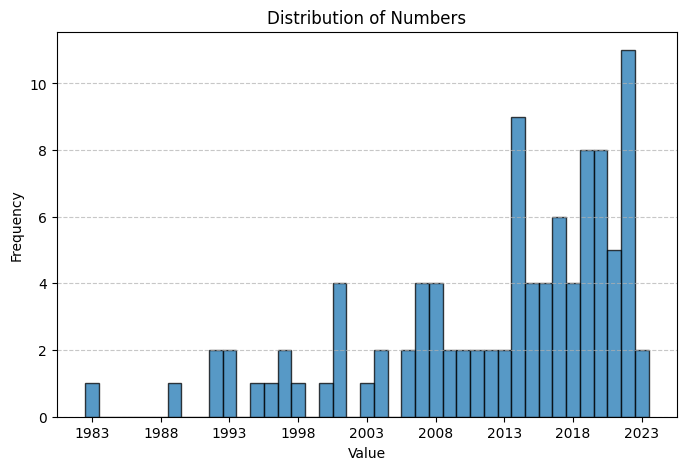

In [8]:
# Date Extractor from pubs
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution as a histogram
plt.figure(figsize=(8, 5))
plt.hist(new_list, bins=np.arange(min(new_list), max(new_list) + 2) - 0.5, edgecolor='black', alpha=0.75)
plt.title('Distribution of Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Set x-ticks to display every 5th year for clarity
plt.xticks(range(min(new_list), max(new_list) + 1, 5))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Random Abstract Picker
import random

count = 0
abstract_list = []

while count <= 100:

    # Define query parameters
    params = {
        "page": count, # Page number of results
        "size": 50,  # Number of results per page
        "format": "json",  # Response format
        "fos": "basic medicine",  # Example: Field of Science classifications
    }
   
    random_pub = random.randrange(0, 50)
    print(random_pub)

    # Fetch publications
    publications = get_publications(BASE_URL, params)
    # print(publications)
    try:
        abstract_list.append(publications['response']['results']['result'][random_pub]['metadata']['oaf:entity']['oaf:result']['description'])
    except KeyError as e:
        random_pub = random.randrange(0, 50)
        print(random_pub)
        abstract_list.append(publications['response']['results']['result'][random_pub]['metadata']['oaf:entity']['oaf:result']['description'])
        
    count += 1

44
<Response [200]>
45
<Response [200]>
41
<Response [200]>
21
<Response [200]>
23


Draft Code